# Experiment 9:          
To implement the following Transform methods
- Uniform Discretization Transform
- k-Means Discretization Transform
- Data Set: sonar.csv

Discretization is the process through which we can transform continuous variables, models or functions into a discrete form. We do this by creating a set of contiguous intervals (or bins) that go across the range of our desired variable/model/function.

## Get data

*Sonar Dataset:* used for classification of sonar signals.

*More about Dataset:* The file "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions.  The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions.  The transmitted sonar signal is a frequency-modulated chirp, rising in frequency.  The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0.  **Each number represents the energy within a particular frequency band, integrated over a certain period of time.**  The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder).  The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

*Dataset from:* The raw.githubusercontent.com domain is used to serve unprocessed versions of files stored in GitHub repositories. If you browse to a file on GitHub and then click the Raw link, that's where you'll go.


In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = pd.read_csv(url, header = None)

## Data Info

In [ ]:
dataset.shape
#dataset.info()

(208, 61)

In [ ]:
dataset[60]
# 'R' for rock and 'M' for metal

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

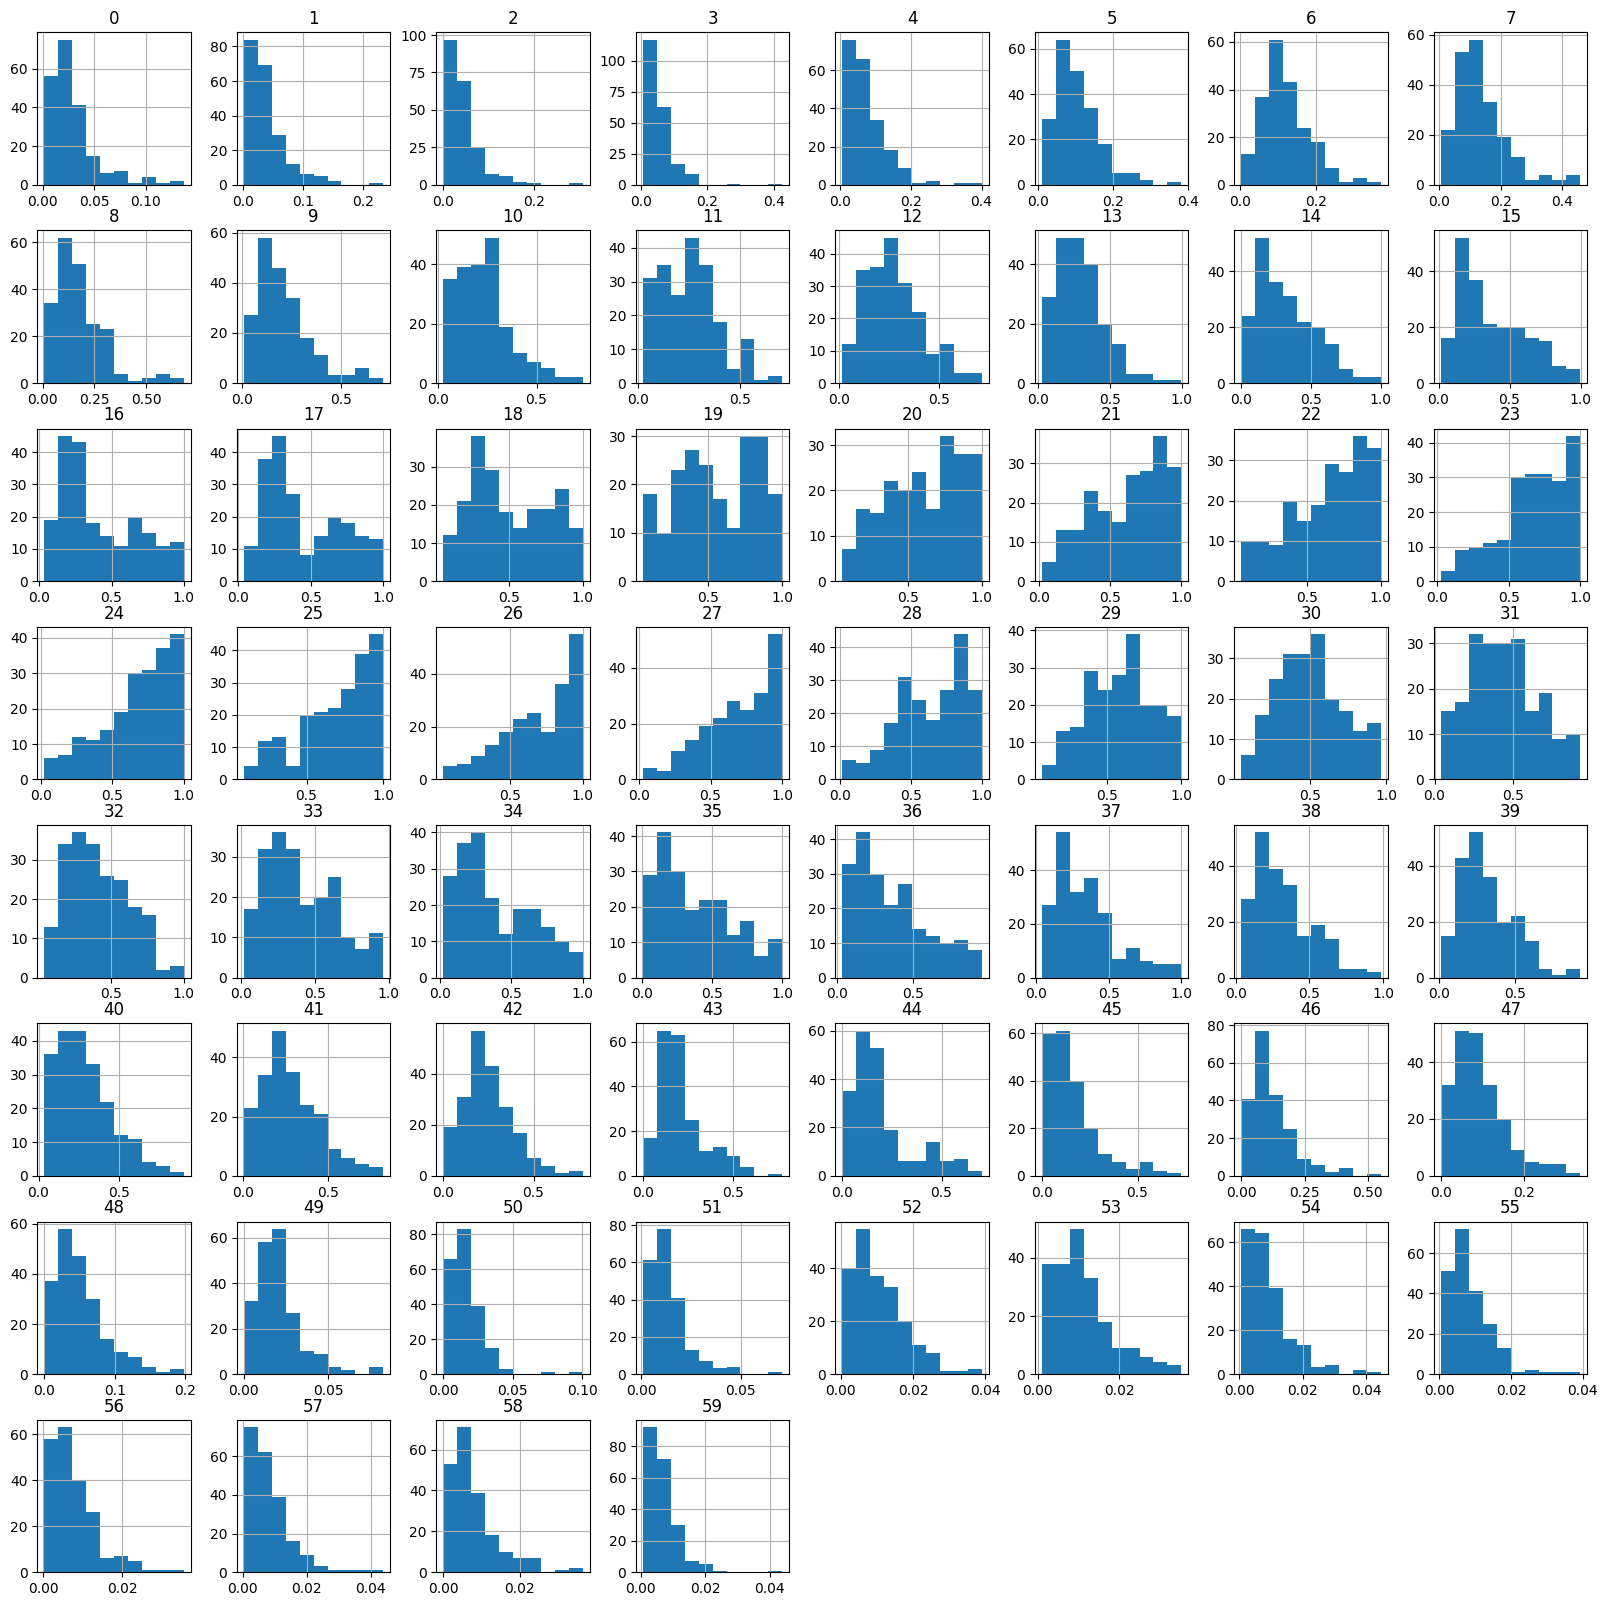

In [ ]:
dataset.hist(figsize = (20,20))
plt.show()

## Uniform Discretization Transform
Using uniform width bins as strategy:

In [ ]:
# eliminate the target variable
data = dataset.values[ : , :-1] # all rows, all but one last column
from sklearn.preprocessing import KBinsDiscretizer

# Bin continuous data into intervals.
discretizer = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'uniform')
# n_bins: The number of bins to produce.
# encode: Method used to encode the transformed result.
# stratergy: Strategy used to define the widths of the bins - 'uniform': All bins in each feature have identical widths.

data_trasformed = pd.DataFrame(discretizer.fit_transform(data))
data_trasformed.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.0,1.0,1.0,0.0,2.0,2.0,4.0,3.0,4.0,2.0,...,2.0,0.0,1.0,4.0,1.0,4.0,5.0,1.0,2.0,0.0
1,3.0,2.0,2.0,1.0,2.0,6.0,5.0,7.0,4.0,3.0,...,1.0,1.0,2.0,1.0,1.0,4.0,3.0,1.0,1.0,0.0
2,1.0,2.0,3.0,2.0,2.0,5.0,6.0,8.0,8.0,8.0,...,0.0,3.0,4.0,2.0,3.0,6.0,8.0,3.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,...,2.0,1.0,0.0,4.0,1.0,1.0,1.0,0.0,1.0,2.0
4,5.0,2.0,1.0,0.0,1.0,1.0,3.0,5.0,5.0,6.0,...,1.0,0.0,1.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0


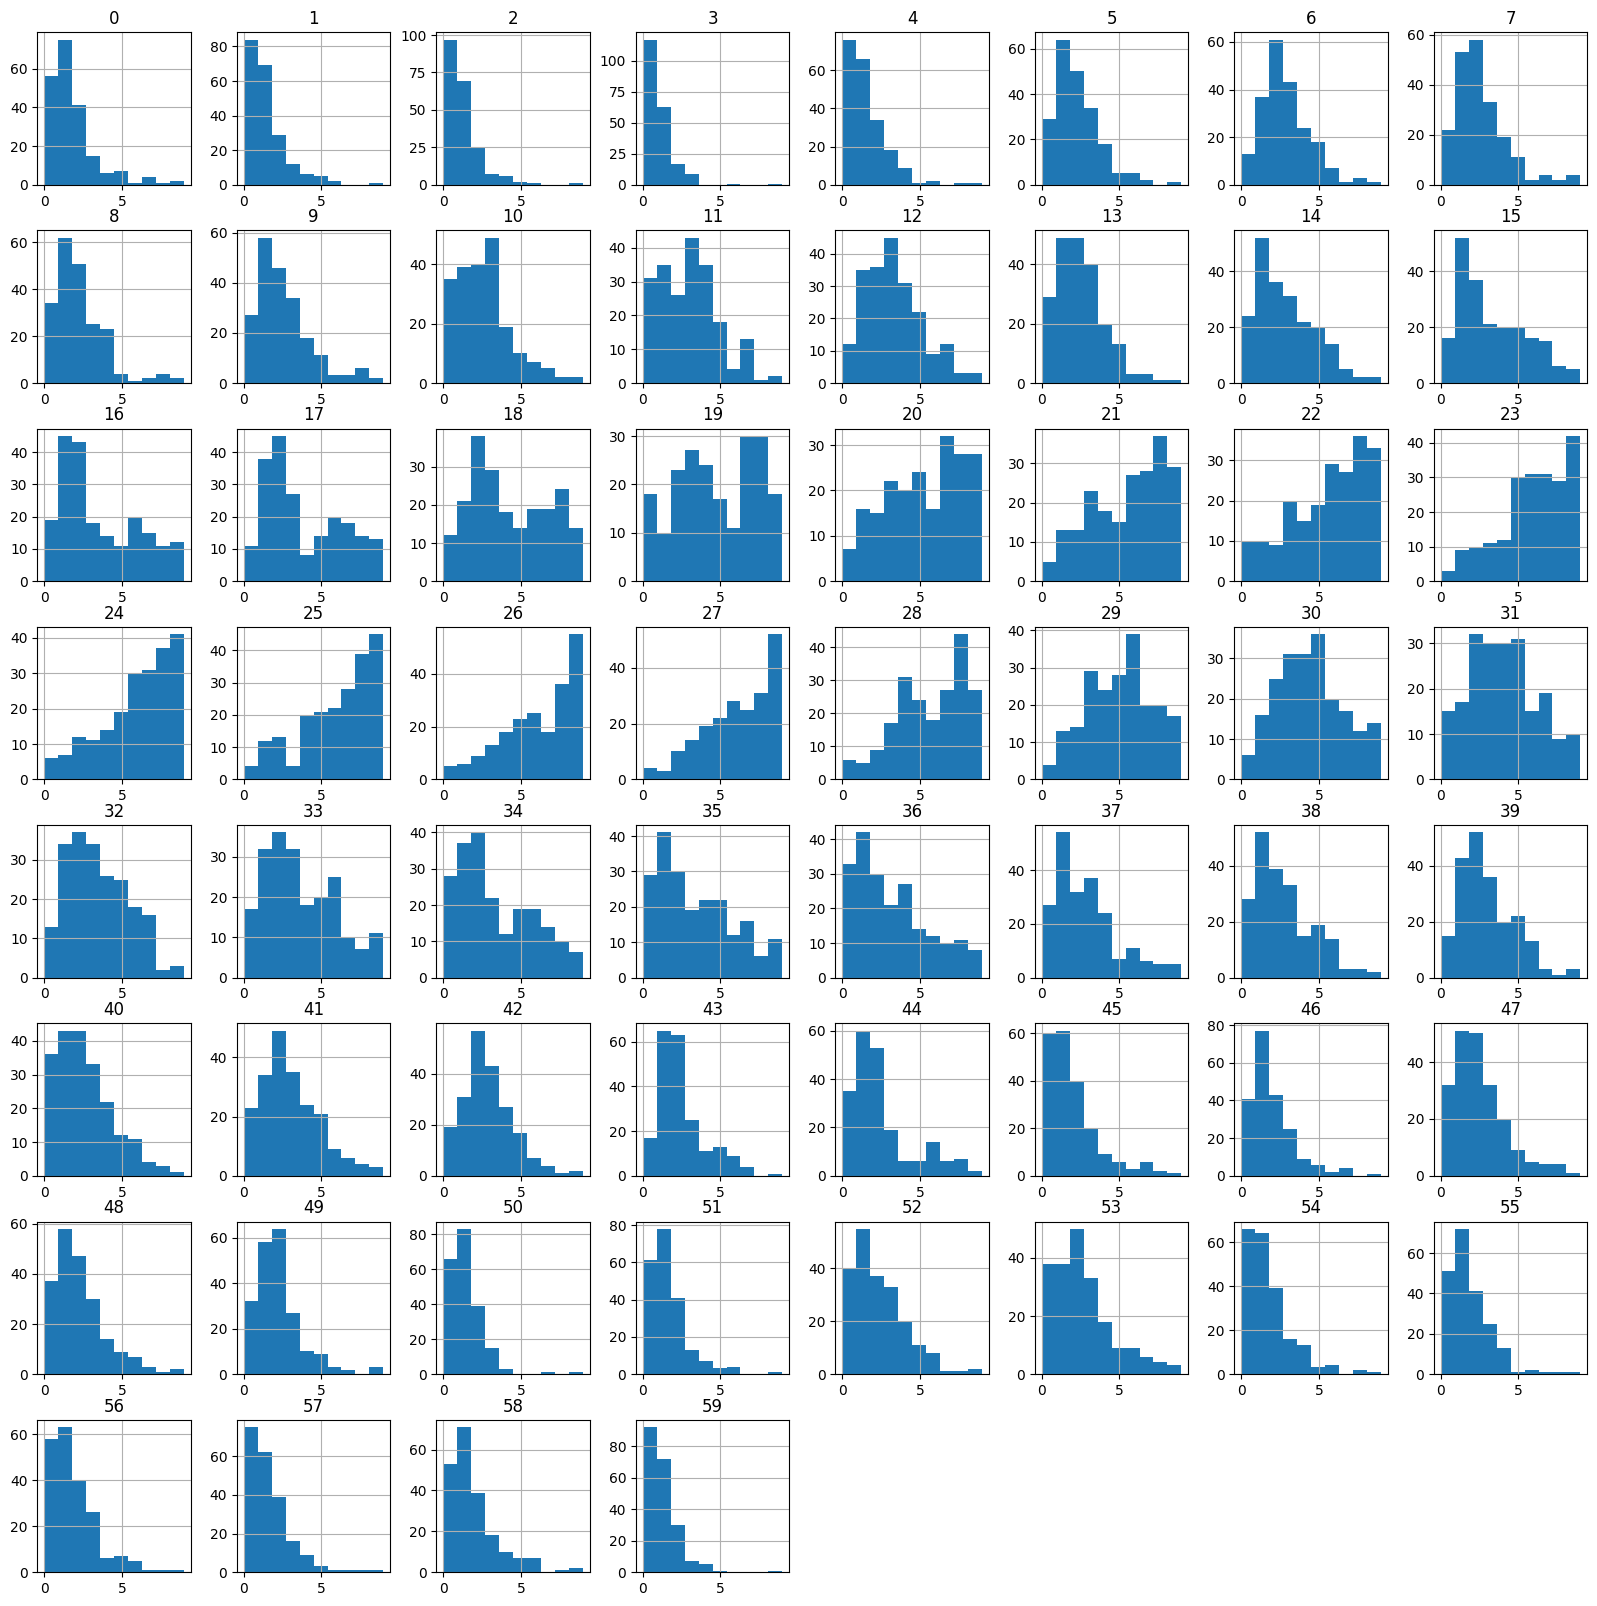

In [ ]:
data_trasformed.hist(figsize = (20,20))
plt.show()

## k-Means Discretization Transform:
Using strategy as kmeans

In [ ]:
kmeans_discretizer =  KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'kmeans')
# strategy as kmeans: Values in each bin have the same nearest center of a 1D k-means cluster.
data_transformed_2 = pd.DataFrame(kmeans_discretizer.fit_transform(data))
data_transformed_2.head()


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,0.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


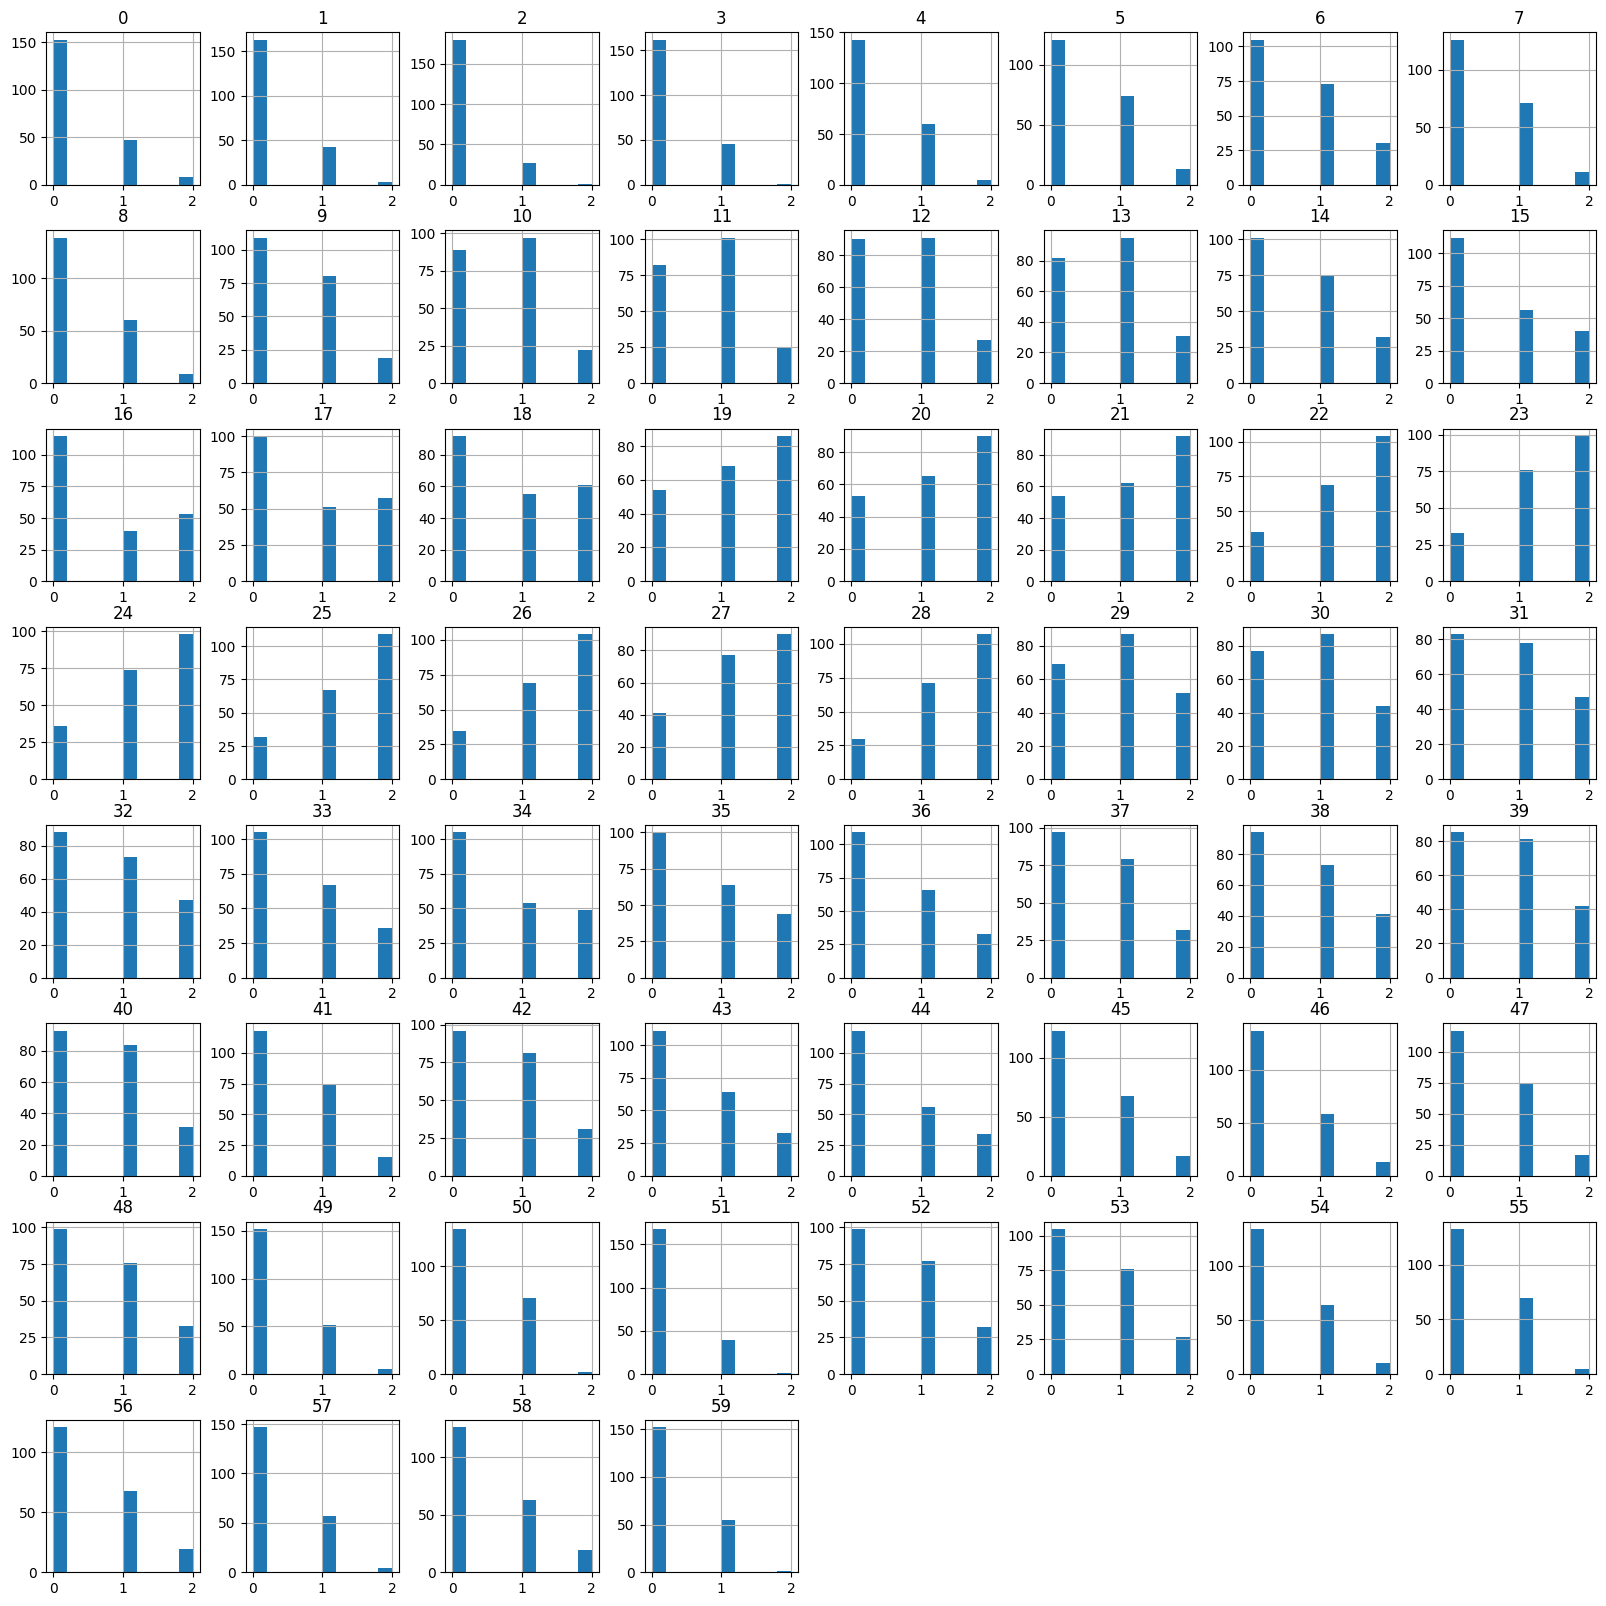

In [ ]:
data_transformed_2.hist(figsize=(20,20))
plt.show()

## Quantile Discretization Transform
Using 'quantile' as strategy -
All bins in each feature have the same number of points.

In [ ]:
quantile_transform = KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy = 'quantile')
data_transformed_3 = pd.DataFrame(quantile_transform.fit_transform(data))
data_transformed_3.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.0,2.0,3.0,0.0,3.0,2.0,3.0,3.0,4.0,2.0,...,4.0,0.0,1.0,4.0,2.0,4.0,4.0,3.0,3.0,1.0
1,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,...,2.0,1.0,2.0,1.0,3.0,4.0,4.0,1.0,1.0,2.0
2,2.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,...,0.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0
3,0.0,1.0,3.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,...,4.0,2.0,0.0,3.0,2.0,2.0,1.0,1.0,1.0,4.0
4,4.0,4.0,3.0,2.0,2.0,1.0,2.0,4.0,4.0,4.0,...,2.0,0.0,1.0,2.0,3.0,0.0,2.0,1.0,3.0,3.0


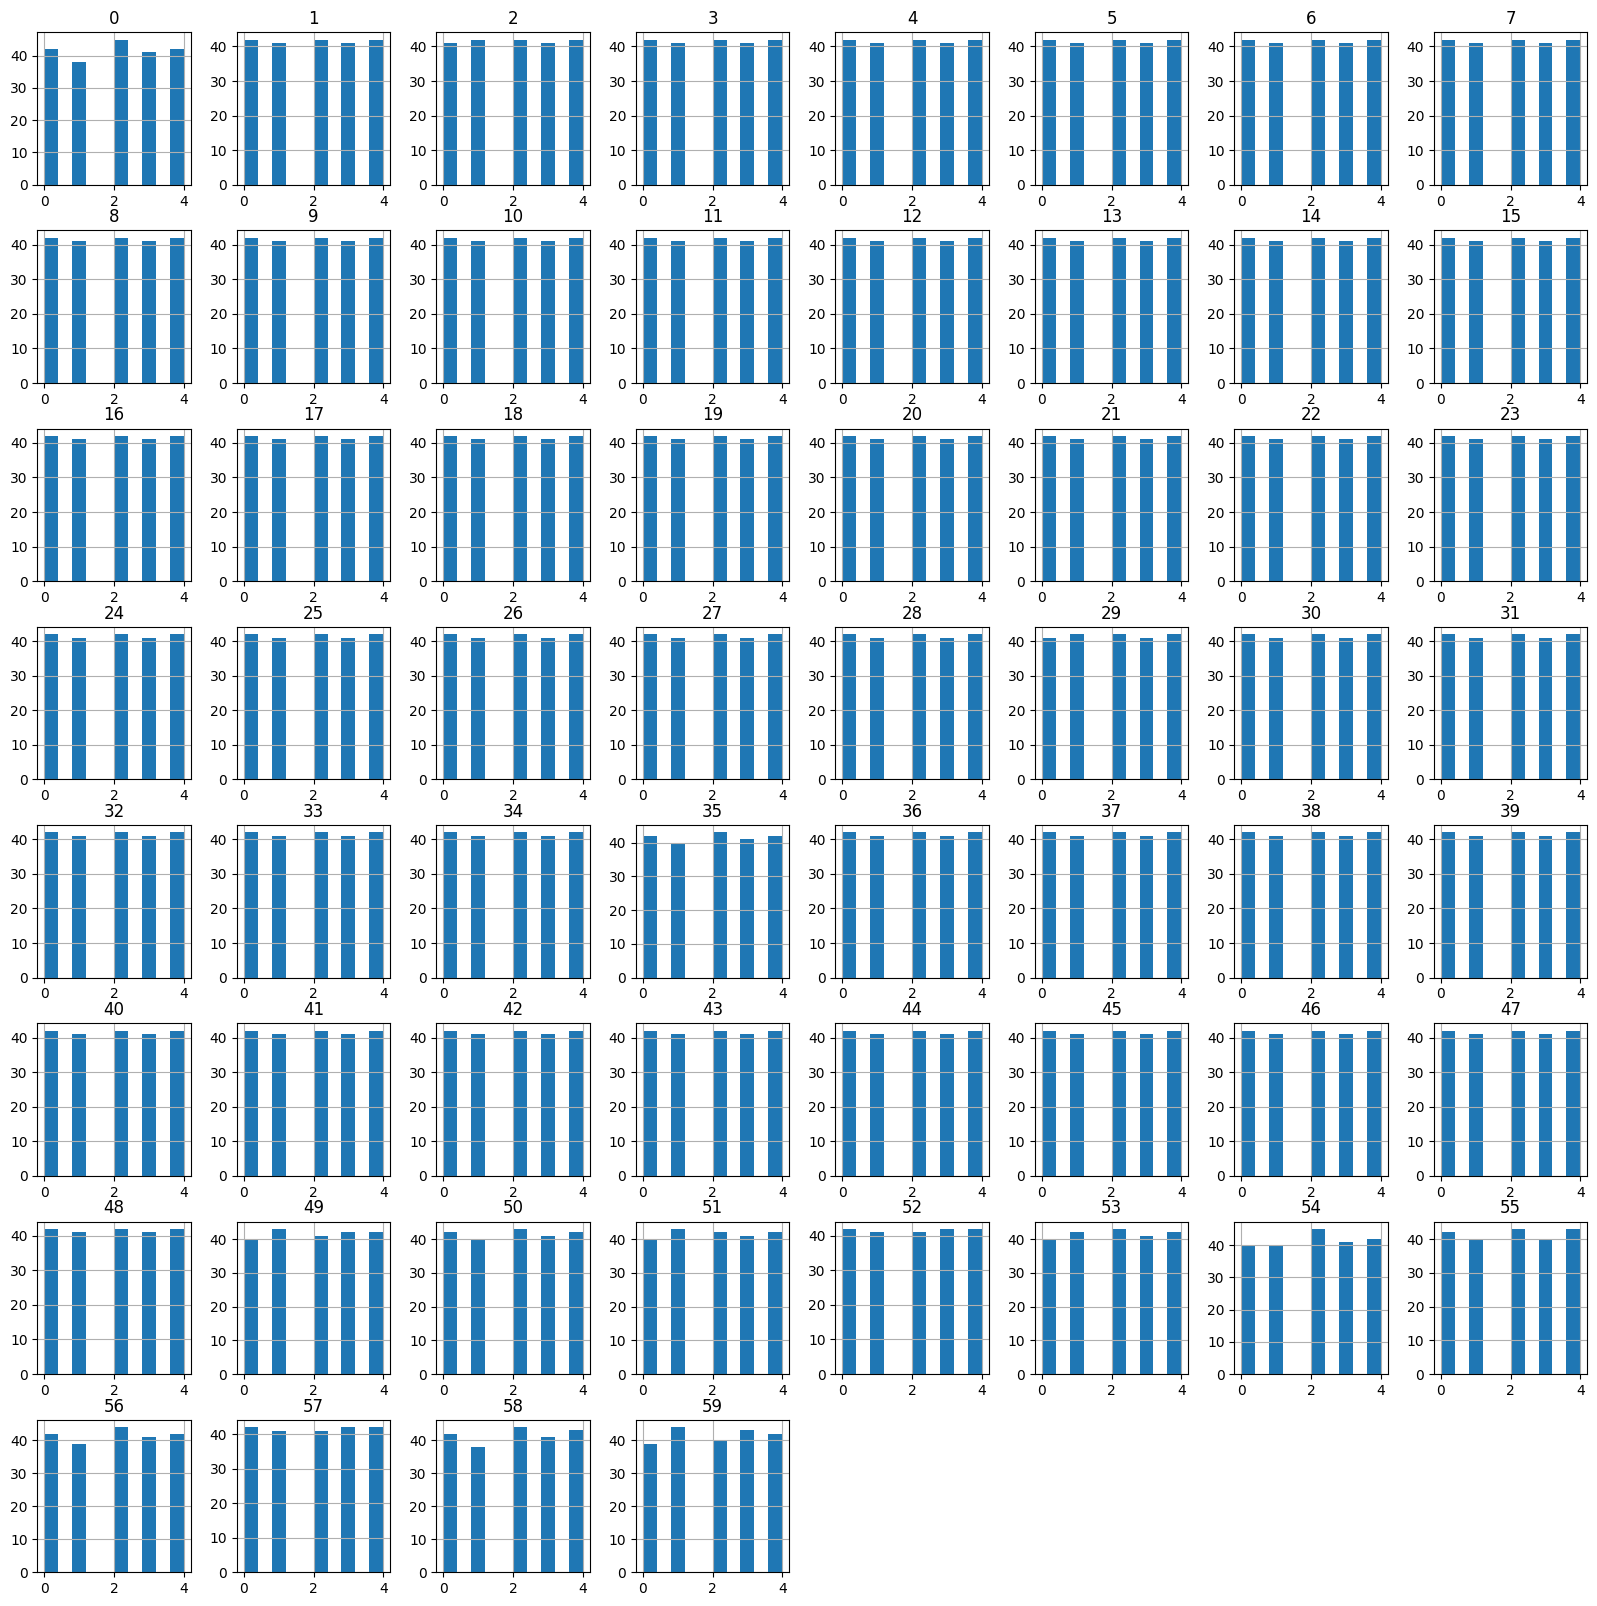

In [ ]:
data_transformed_3.hist(figsize = (20,20))
plt.show()

# The End